In [1]:
#Gerekli kütüphaneleri ekleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Veri setini yükleme
data=pd.read_csv('THY.csv')

In [3]:
#ilk birkaç satırı yükleme
data.head()

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,04.11.2024,"268,50","272,00","273,00","267,00","18,42M","-1,65%"
1,01.11.2024,"273,00","273,00","274,75","271,50","19,99M","0,18%"
2,31.10.2024,"272,50","277,75","279,00","272,50","14,47M","-1,80%"
3,30.10.2024,"277,50","277,75","280,00","276,50","14,80M","-0,18%"
4,28.10.2024,"278,00","278,50","280,00","276,25","7,04M","0,72%"


Veriyi hazırlama aşamasına geçelim

In [5]:
# Tarih sütununu datetime formatına çevirme ve gün numarası ekleme
data['Tarih'] = pd.to_datetime(data['Tarih'], format='%d.%m.%Y')
data = data.sort_values(by='Tarih')  # Tarihe göre sıralama

# Gün numarası ekleme
data['Gün'] = np.arange(len(data))


In [12]:
# Şimdi sütununu sayısal formata çevirme
data['Şimdi'] = data['Şimdi'].str.replace(',', '.').astype(float)

In [13]:
#Polinom özellikler oluşturma
X=data[['Gün']] #Bağımsız değişken
y=data['Şimdi'] #Hedef degisken

#Polinom özelligi olusturma
polinom=PolynomialFeatures(degree=3)
X_poly=polinom.fit_transform(X)

In [14]:
# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [15]:
# Modeli tanımlama ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Tahmin yapma
y_pred = model.predict(X_test)


In [17]:
# Model değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 363.1006707924153
R-squared (R²): 0.5020894886499276


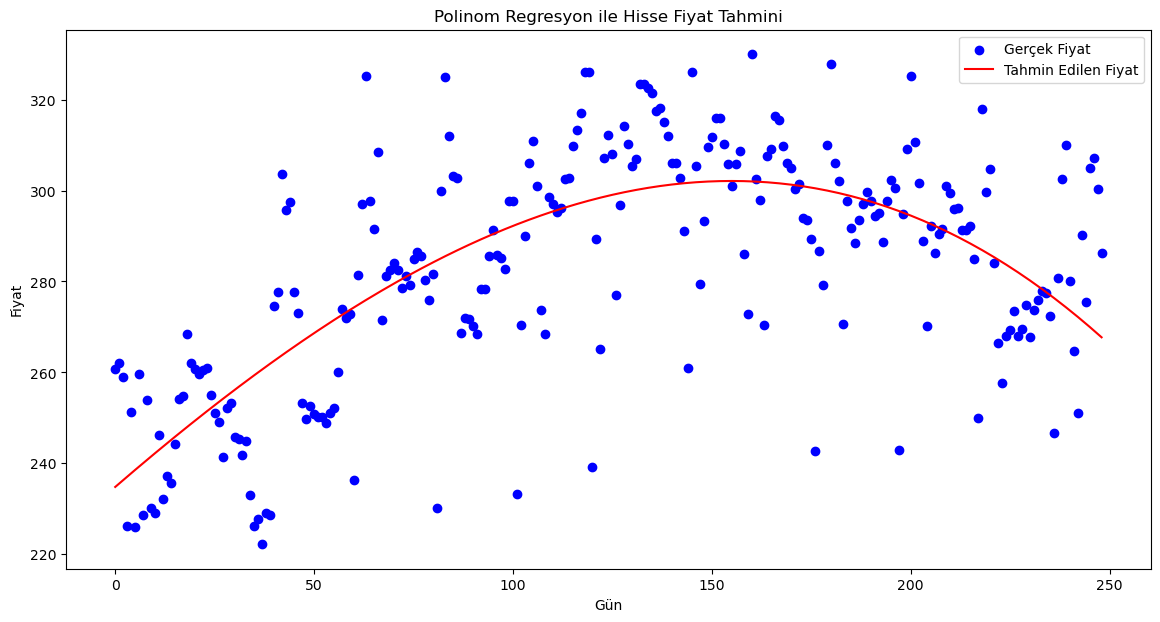

In [19]:
plt.figure(figsize=(14, 7))
plt.scatter(data['Gün'], data['Şimdi'], color='blue', label='Gerçek Fiyat')
plt.plot(data['Gün'], model.predict(polinom.transform(data[['Gün']])), color='red', label='Tahmin Edilen Fiyat')
plt.xlabel('Gün')
plt.ylabel('Fiyat')
plt.title('Polinom Regresyon ile Hisse Fiyat Tahmini')
plt.legend()
plt.show()
